# Lab 7-2 결정 트리 모델로 와인 분류

## 라이브러리 import

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  Malgun Gothic')
Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 414 ('axes.unicode_minus: False')


## 데이터 준비

In [3]:
df_wine = pd.read_csv('../data/wine.csv')
df_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
df_wine['class'].unique()
## 0: red wine, 1: white wine

array([0., 1.])

In [5]:
data = df_wine[['alcohol','sugar','pH']].to_numpy()
target = df_wine['class'].to_numpy()

In [6]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

## 정규화

In [7]:
ss = StandardScaler()

In [8]:
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 모델 생성, 학습, 평가

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(random_state=42)

In [11]:
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [12]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


## 분류

In [24]:
test_scaled[:5]

array([[ 1.44082714,  1.52797084,  0.26967864],
       [-0.48990299, -0.68214836,  0.3323304 ],
       [ 1.27293756,  0.40206106, -0.23153545],
       [-0.82568214,  1.19436794, -0.60744601],
       [-1.32935087,  1.75732283, -0.67009777]])

In [25]:
test_target[:5]

array([1., 0., 1., 1., 1.])

In [26]:
dt.predict(test_scaled[:5])

array([1., 0., 1., 1., 1.])

In [27]:
dt.predict_proba(test_scaled[:5])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

## 구조

In [16]:
from sklearn.tree import plot_tree

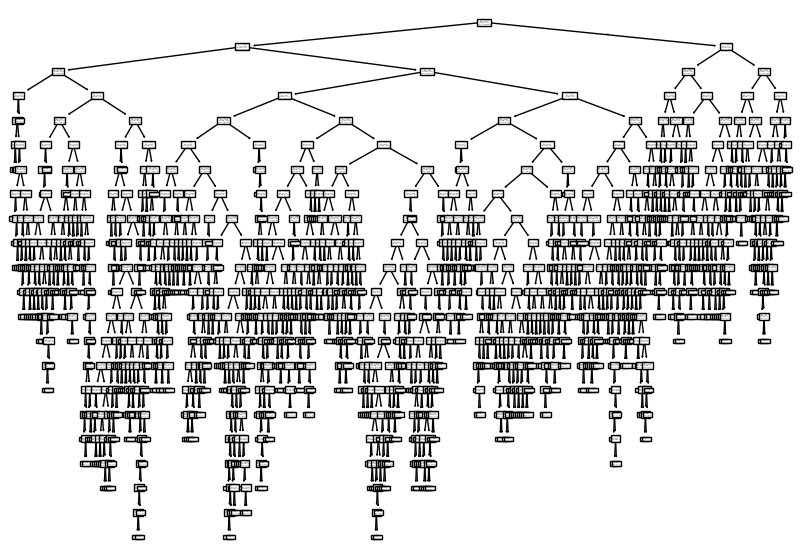

In [17]:
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

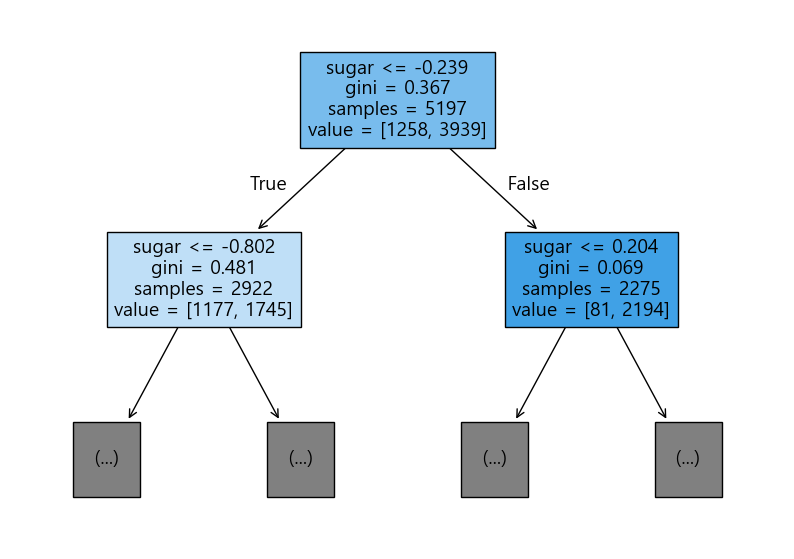

In [30]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()